### Implementação de um perceptron com uma camada oculta

In [46]:
import numpy as np
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [234]:
class Perceptron_1hl():

    def __init__(self, iters=100, taxa_aprendizado=0.01, nodes_hidden=4):
        self.iters = iters
        self.taxa_aprendizado = taxa_aprendizado
        # cria um array inicialmente com zeros, a 1a posicao do array sera o bias, as outras posições os pesos
        self.erros = []
        self.nodes_hidden = nodes_hidden 
    
    def predict(self, x):
        if self.feedforward(x) > .5:
            return 1
        return 0
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_derivate(self, x):
        return self.sigmoid(x)*self.sigmoid(1-x)
    
    def feedforward(self, x):
        # multiplica cada entrada pelo peso do no da camada oculta
        self.z_oculta = np.dot(x, self.pesos_oculta)

        # passa pela função de ativação
        self.a_oculta = self.sigmoid(self.z_oculta)

        # multiplica a saida de cada nó da camada oculta pelo peso do nó de saida
        self.z_saida = np.dot(self.a_oculta, self.pesos_saida)

         # passa pela função de ativação de saida
        a_saida = self.sigmoid(self.z_saida)
        
        return a_saida
    
    def fit(self, X, y):
        
        # pesos da camada oculta
        self.pesos_oculta = np.random.rand(len(X[0]), self.nodes_hidden) 

        # pesos da saida
        self.pesos_saida = np.random.rand(self.nodes_hidden, 1) 
        
        for _ in range(self.iters):
            erros = 0
            for x_i, y_i in zip(X, y):
                
                ##### FEED FORWARD
                a_saida = self.feedforward(x_i)

                ######## BACK PROPAGATION FASE 1 - CALCULO DO GRADIENTE PARA CAMADA DE SAIDA
                # MSE
                erro_saida = ((1 / 2) * (np.power((a_saida - y_i), 2)))
                erro_soma = sum(erro_saida)
                
                # minimiza a função custo
                # dcost/dpesos = dcost/da_saida * da_saida/dz_saida * dz_saida/dpesos
                # derivada do custo em relacao a func de ativacao : dcost = 2/n*(a_saida-y_i)  , 2/n é constante e pode ser dispensavel
                dcost_da_saida = a_saida - y_i

                # derivada da func de ativacao em relação ao somatorio z
                da_saida_dz_saida = self.sigmoid_derivate(self.z_saida) 

                # derivada de z em relacao aos pesos
                dz_saida_dw_saida = np.array([self.a_oculta])

                dcost_w_saida = np.dot(dz_saida_dw_saida.T, dcost_da_saida * da_saida_dz_saida)

                
                ######## BACK PROPAGATION FASE 2 - CALCULO DO GRADIENTE PARA CAMADA OCULTA
                dcost_dz_saida = dcost_da_saida * da_saida_dz_saida
                dz_saida_da_oculta = self.pesos_saida                
                dcost_da_oculta = np.dot(dcost_dz_saida , dz_saida_da_oculta.T)                
                
                da_oculta_dz_oculta = self.sigmoid_derivate(self.z_oculta) 
                dz_oculta_dw_oculta = np.array([x_i])

                dcost_w_oculta = np.dot(dz_oculta_dw_oculta.T, np.array([da_oculta_dz_oculta * dcost_da_oculta]))

                ###### Atualiza pesos
                self.pesos_oculta -= self.taxa_aprendizado * dcost_w_oculta

                self.pesos_saida -= self.taxa_aprendizado * np.array([dcost_w_saida]).T

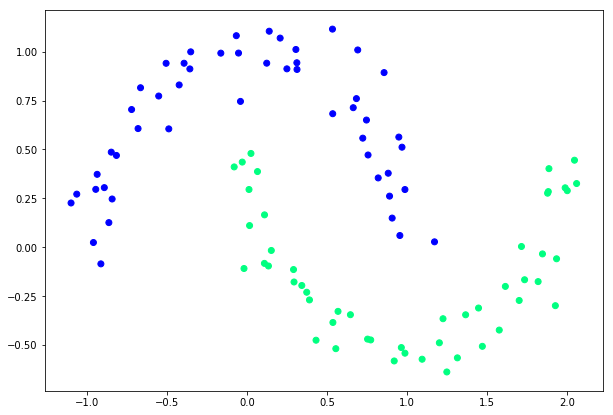

In [221]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
feature_set, labels = datasets.make_moons(100, noise=0.10)
plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)

labels = labels.reshape(100, 1)

In [255]:
p = Perceptron_1hl(iters=2000,taxa_aprendizado=0.5)

In [256]:
p.fit(feature_set,labels)

In [257]:
i=0
for j in feature_set:
    l = p.predict(j)
    if l != labels[i]:
        print("errou", i, labels[i], l)
    i+=1

errou 2 [0] 1
errou 3 [1] 0
errou 8 [1] 0
errou 10 [1] 0
errou 34 [1] 0
errou 37 [1] 0
errou 40 [0] 1
errou 52 [0] 1
errou 55 [1] 0
errou 59 [1] 0


In [254]:
feature_set[2]

array([0.95535658, 0.05999942])

In [ ]:
errou 2 [0] 1
errou 3 [1] 0
errou 8 [1] 0
errou 10 [1] 0
errou 34 [1] 0
errou 37 [1] 0
errou 40 [0] 1
errou 44 [0] 1
errou 49 [0] 1
errou 52 [0] 1
errou 55 [1] 0
errou 59 [1] 0